In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fake_reg-Copy1.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


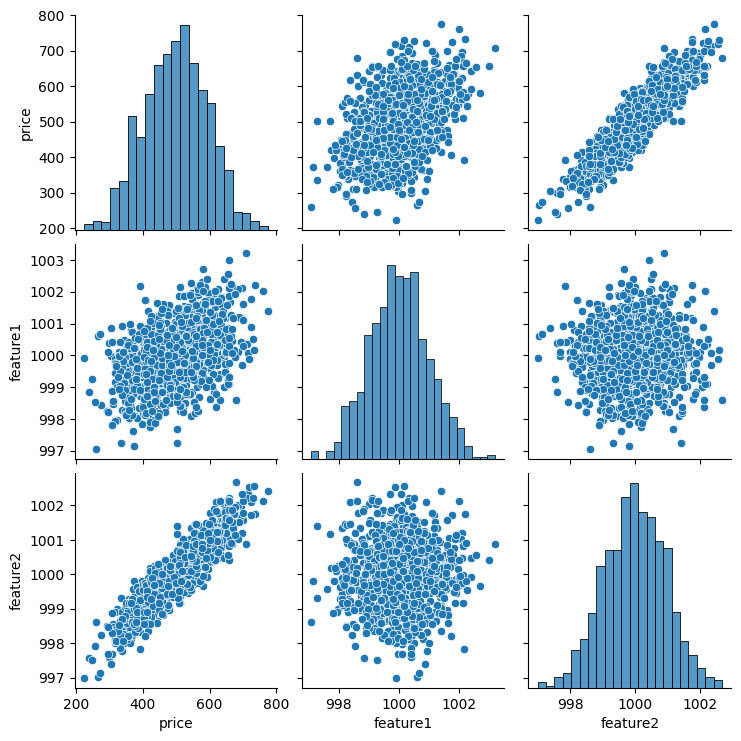

In [5]:
sns.pairplot(df)

In [6]:
X = df[['feature1','feature2']].values
y = df['price'].values

# Train Test and Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

# Scaling and Transform

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

# Tensorflow

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense, Activation

In [19]:
# first way to write code in tensorflow (List method)
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [20]:
# one by one method
model = Sequential()
model.add(Dense(units=2))
model.add(Dense(units=2))
model.add(Dense(units=2))

In [21]:
# lets make a simple neuron network
model = Sequential()

model.add(Dense(units=4))
model.add(Dense(units=4))
model.add(Dense(units=4))

# output layer
model.add(Dense(units=1))

#compilation
model.compile(optimizer='rmsprop',loss='mse')

In [22]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 2ms/step - loss: 259551.2656
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 259185.3906
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 258840.4844
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 258460.2500
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 258039.8594
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 257562.0156
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 257006.6094
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 256357.7344
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 255607.1719
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 254751.9062
Epoch 11/200
22/22 [==============================] - 0s 2ms/step - loss: 253757.2188
Epoch 12/200
22/22 [==============================] - 0s 2ms/st

In [23]:
model.history.history

{'loss': [259551.265625,
  259185.390625,
  258840.484375,
  258460.25,
  258039.859375,
  257562.015625,
  257006.609375,
  256357.734375,
  255607.171875,
  254751.90625,
  253757.21875,
  252600.890625,
  251273.234375,
  249761.28125,
  248040.359375,
  246102.859375,
  243944.5,
  241530.515625,
  238842.859375,
  235882.921875,
  232611.015625,
  229040.203125,
  225143.421875,
  220914.828125,
  216308.5,
  211380.546875,
  206052.0625,
  200355.125,
  194295.453125,
  187854.953125,
  181020.359375,
  173820.828125,
  166242.609375,
  158296.375,
  150045.109375,
  141477.671875,
  132626.203125,
  123482.8671875,
  114133.6015625,
  104648.796875,
  95073.7265625,
  85502.4609375,
  75910.875,
  66427.6953125,
  57172.44140625,
  48171.109375,
  39687.453125,
  31711.15625,
  24434.375,
  18021.287109375,
  12488.3212890625,
  8175.0791015625,
  5056.06982421875,
  3231.4599609375,
  2499.683349609375,
  2383.469970703125,
  2341.790283203125,
  2280.131591796875,
  2222.45849

Text(0.5, 1.0, 'Training loss per epoch')

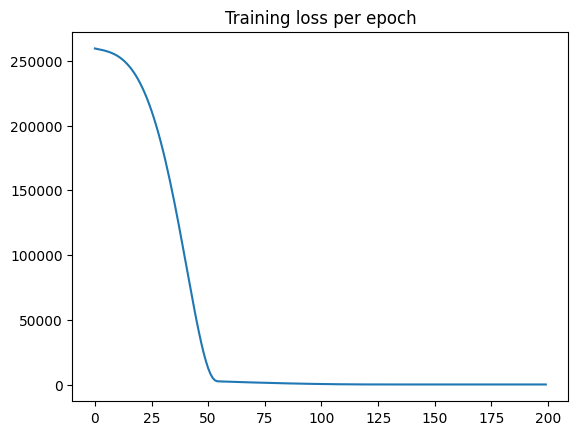

In [24]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title('Training loss per epoch')

# Evaluation on training and testing data

In [25]:
model.metrics_names

['loss']

In [26]:
training_score = model.evaluate(X_train,y_train,verbose=0)

In [27]:
test_score = model.evaluate(X_test,y_test,verbose=0)

In [28]:
print(training_score)
print(test_score)

22.855880737304688
27.155122756958008


# Predictions Evaluation

In [29]:
test_prediction = model.predict(X_test)

In [30]:
test_prediction

array([[654.7899 ],
       [512.49994],
       [518.78955],
       [485.43655],
       [541.9419 ],
       [556.1039 ],
       [602.5055 ],
       [630.40283],
       [600.90454],
       [556.20013],
       [416.78372],
       [474.22372],
       [447.7115 ],
       [482.94217],
       [490.4744 ],
       [565.60657],
       [365.11795],
       [502.00748],
       [578.6138 ],
       [530.48096],
       [472.98917],
       [344.50693],
       [484.6641 ],
       [529.8457 ],
       [586.1134 ],
       [546.03424],
       [365.42734],
       [552.7375 ],
       [645.4004 ],
       [508.44418],
       [564.7929 ],
       [486.07074],
       [556.2394 ],
       [701.1572 ],
       [381.08597],
       [433.93338],
       [461.54688],
       [431.47437],
       [381.8785 ],
       [558.91986],
       [328.75223],
       [616.5817 ],
       [615.159  ],
       [525.3168 ],
       [576.5276 ],
       [485.14984],
       [455.86966],
       [410.6414 ],
       [519.12604],
       [628.30994],


In [31]:
pred_df = pd.DataFrame(y_test,columns=['Actual Y'])

In [32]:
pred_df

,Actual Y
0,655.391403
1,511.366708
2,515.778446
3,478.358238
4,543.830279
...,...
295,372.777436
296,639.818362
297,403.062564
298,579.428431


In [33]:
test_predictions = pd.Series(test_prediction.reshape(300,))

In [34]:
test_predictions

0      654.789917
1      512.499939
2      518.789551
3      485.436554
4      541.941895
          ...    
295    369.820068
296    638.085205
297    395.370178
298    584.557983
299    511.622009
Length: 300, dtype: float32

In [35]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [36]:
pred_df.columns = ['Actual Y','Predicted Y']

In [37]:
pred_df

,Actual Y,Predicted Y
0,655.391403,654.789917
1,511.366708,512.499939
2,515.778446,518.789551
3,478.358238,485.436554
4,543.830279,541.941895
...,...,...
295,372.777436,369.820068
296,639.818362,638.085205
297,403.062564,395.370178
298,579.428431,584.557983


<Axes: xlabel='Actual Y', ylabel='Predicted Y'>

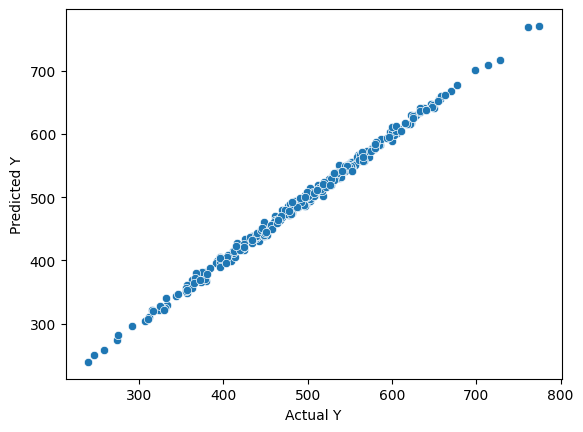

In [38]:
sns.scatterplot(x='Actual Y',y='Predicted Y',data=pred_df)

In [39]:
pred_df['Error'] = pred_df['Actual Y'] - pred_df['Predicted Y']

<Axes: ylabel='Density'>

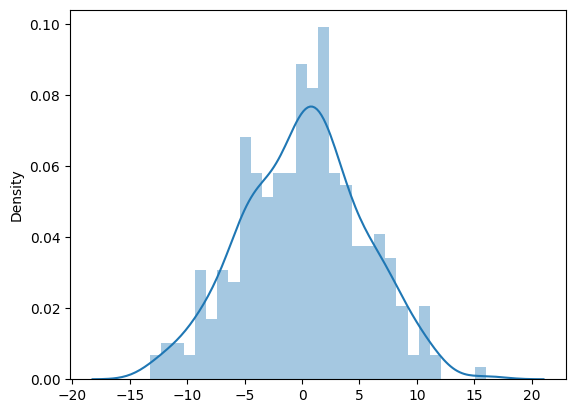

In [40]:
sns.distplot(x=pred_df['Error'],bins=30)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(pred_df['Actual Y'],pred_df['Predicted Y'])

4.1562301910422725

In [43]:
mean_squared_error(pred_df['Actual Y'],pred_df['Predicted Y'])

27.155122445014868

In [44]:
test_score

27.155122756958008

RMSE

In [45]:
test_score**0.5

5.2110577387856685

# Predicting New Data

In [46]:
new_data = [[996,1002]]

In [47]:
scaler.transform(new_data)

array([[-0.188637  ,  0.88249903]])

In [48]:
new_gem = scaler.transform(new_data)

In [49]:
model.predict(new_gem)

array([[516.4958]], dtype=float32)

# Saving and Loading Model

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save('my_model.h5')

In [52]:
later_model = load_model('my_model.h5')

In [53]:
later_model.predict(new_gem)

array([[516.4958]], dtype=float32)